In [1]:
import matplotlib.pyplot as plt # for creatingvisualizations like graphs and plots.
import networkx as nx # creating networks
import urllib3 #sending http requests using python 
from bs4 import BeautifulSoup #parsing the data out of html
from collections import defaultdict #Python dictionary that initializes default values for keys that are not present in the dictionary.
import requests #sending http requests
import seaborn as sns #visualizing the data using various plots
import pandas as pd #to work with data sets
from kora.selenium import wd #for running selenium, to access google scholar profile

In [2]:
scholar = 'https://scholar.google.com/citations?user=tvmxzygAAAAJ&hl=en&oi=sra'
nodes=100

In [30]:
wd.get(scholar) #accesssing google scholar profile
# wd.page_source

In [3]:
#to crawl Google Scholar and create a directed graph of co-author relationships.
def getGraph(seed, Nmax): 
    urls = defaultdict(int) #url is a dic
    urls[seed]+=1 #intialise with 1 as it is visited
    newUrls = [seed] # list, newUrls is initialized with the seed URL.
    G = nx.DiGraph() #an instance of a directed graph 
    
    
    #retriving html of the page
    #extracting the co-authors and their corresponding URLs using the BeautifulSoup library
    #co-authors are added to the urls dictionary with a value of zero, as not visited
    
    def coAuthors(url):
        print(url)
        coUrls = []
        coNames = []
        
        wd.get(url)
        response = wd.page_source
        # response = requests.get(url)

        soup = BeautifulSoup(response, "html.parser")
        s = soup.body.findAll('a', {"tabindex": "-1"})
        egoName = soup.body.find('div', {"id": "gsc_prf_in"}).text 
        print(egoName)
        print("******")
        if s:
            for i in s:
                if i.text=="Sort by citations" or i.text=="Sort by year" or i.text=="Sort by title":
                  continue
                coNames.append(i.text) 
                #for network plot
                coUrls.append('http://scholar.google.nl'+ i['href'])
        for j in coUrls:
            urls[j] += 0
        for m in coNames:
            G.add_edge(egoName.split(',')[0], m.split(',')[0], weight = 1)
        return coUrls
    
    while newUrls:
        for k in urls.keys(): 
            # update url.values() first
            urls[k] += 1 
        addUrls = [] 
        # get new-added authors, may have duplications.
        for i in newUrls:
            
            #coAuthors(i)
            coUrls = coAuthors(i)
            if coUrls:
                for j in coUrls:
                    addUrls.append(j)
        for m in set(addUrls): 
            # get rid of the duplications
            urls[m] += 0
        newUrls = [k for k, v in urls.items() if v <= 1]
        # This is for updating the new coauthors and avoid the deadloop: a->b->a->......
        addUrls = []   
        print(len(urls.keys()))
        if len(urls.keys()) > Nmax:
            print('more than '+str(Nmax)+' people now, break')
            break
        print(newUrls)
    return G

In [4]:
#to extract the name of person from google scholar
def getName(seed, Nmax):
    #urls = defaultdict(int)
    G = nx.DiGraph()
    response = requests.get(seed) #sends a GET request to the given seed URL to fetch the HTML content of the page.
    wd.get(seed) #opening the link in selenium web driver instance wd
    soup = soup = BeautifulSoup(wd.page_source, "html.parser") #creates beautifulSoup obj
    
    #will store name and id of person whose google scholar id is scraped
    egoName = soup.body.find("div", id="gsc_prf_in")
    # print(egoName);
    print(egoName) #print the name of the person to the console
    return egoName #returns the name of the person as the string 

In [5]:
#get Name of the author
name = getName(scholar, nodes)

<div id="gsc_prf_in">Matthijs J. Warrens</div>


In [6]:
#get coauthor List
g = getGraph(scholar, nodes)

https://scholar.google.com/citations?user=tvmxzygAAAAJ&hl=en&oi=sra
Matthijs J. Warrens
******
14
['http://scholar.google.nl/citations?user=-U1TQ5gAAAAJ&hl=en', 'http://scholar.google.nl/citations?user=x9ukpr0AAAAJ&hl=en', 'http://scholar.google.nl/citations?user=ovoyC-kAAAAJ&hl=en', 'http://scholar.google.nl/citations?user=Y3ZmEWwAAAAJ&hl=en', 'http://scholar.google.nl/citations?user=08KXrAIAAAAJ&hl=en', 'http://scholar.google.nl/citations?user=5eiUuO0AAAAJ&hl=en', 'http://scholar.google.nl/citations?user=_d9scVEAAAAJ&hl=en', 'http://scholar.google.nl/citations?user=4RvhI-AAAAAJ&hl=en', 'http://scholar.google.nl/citations?user=l7s7CjcAAAAJ&hl=en', 'http://scholar.google.nl/citations?user=JR_msDAAAAAJ&hl=en', 'http://scholar.google.nl/citations?user=a4X7AFcAAAAJ&hl=en', 'http://scholar.google.nl/citations?user=Wxaac_gAAAAJ&hl=en', 'http://scholar.google.nl/citations?user=NRKUWiYAAAAJ&hl=en']
http://scholar.google.nl/citations?user=-U1TQ5gAAAAJ&hl=en
Roel J. Bosker
******
http://scholar

In [33]:
def plot_(g): #visualizing graph g using the NetworkX and Matplotlib
    plt.figure(figsize = (30, 30)) #creating a new figure
    pos = nx.spring_layout(g)  #position node of the graph using spring layout algo
    nx.draw_networkx_labels(g, pos, font_color='k', font_size = 14)#black color, size 14, graph g, position pos
    nx.draw(g, pos, node_size = 20, edge_color = 'grey', width = 0.4, arrows = True) #visible arrows
    #str1=name
    str2="'s Google Scholar Network"
    myTitle=str(name)+str2
    plt.title(myTitle, fontsize=40)
    #plt.xticks([])
    #plt.yticks([])
    plt.show()

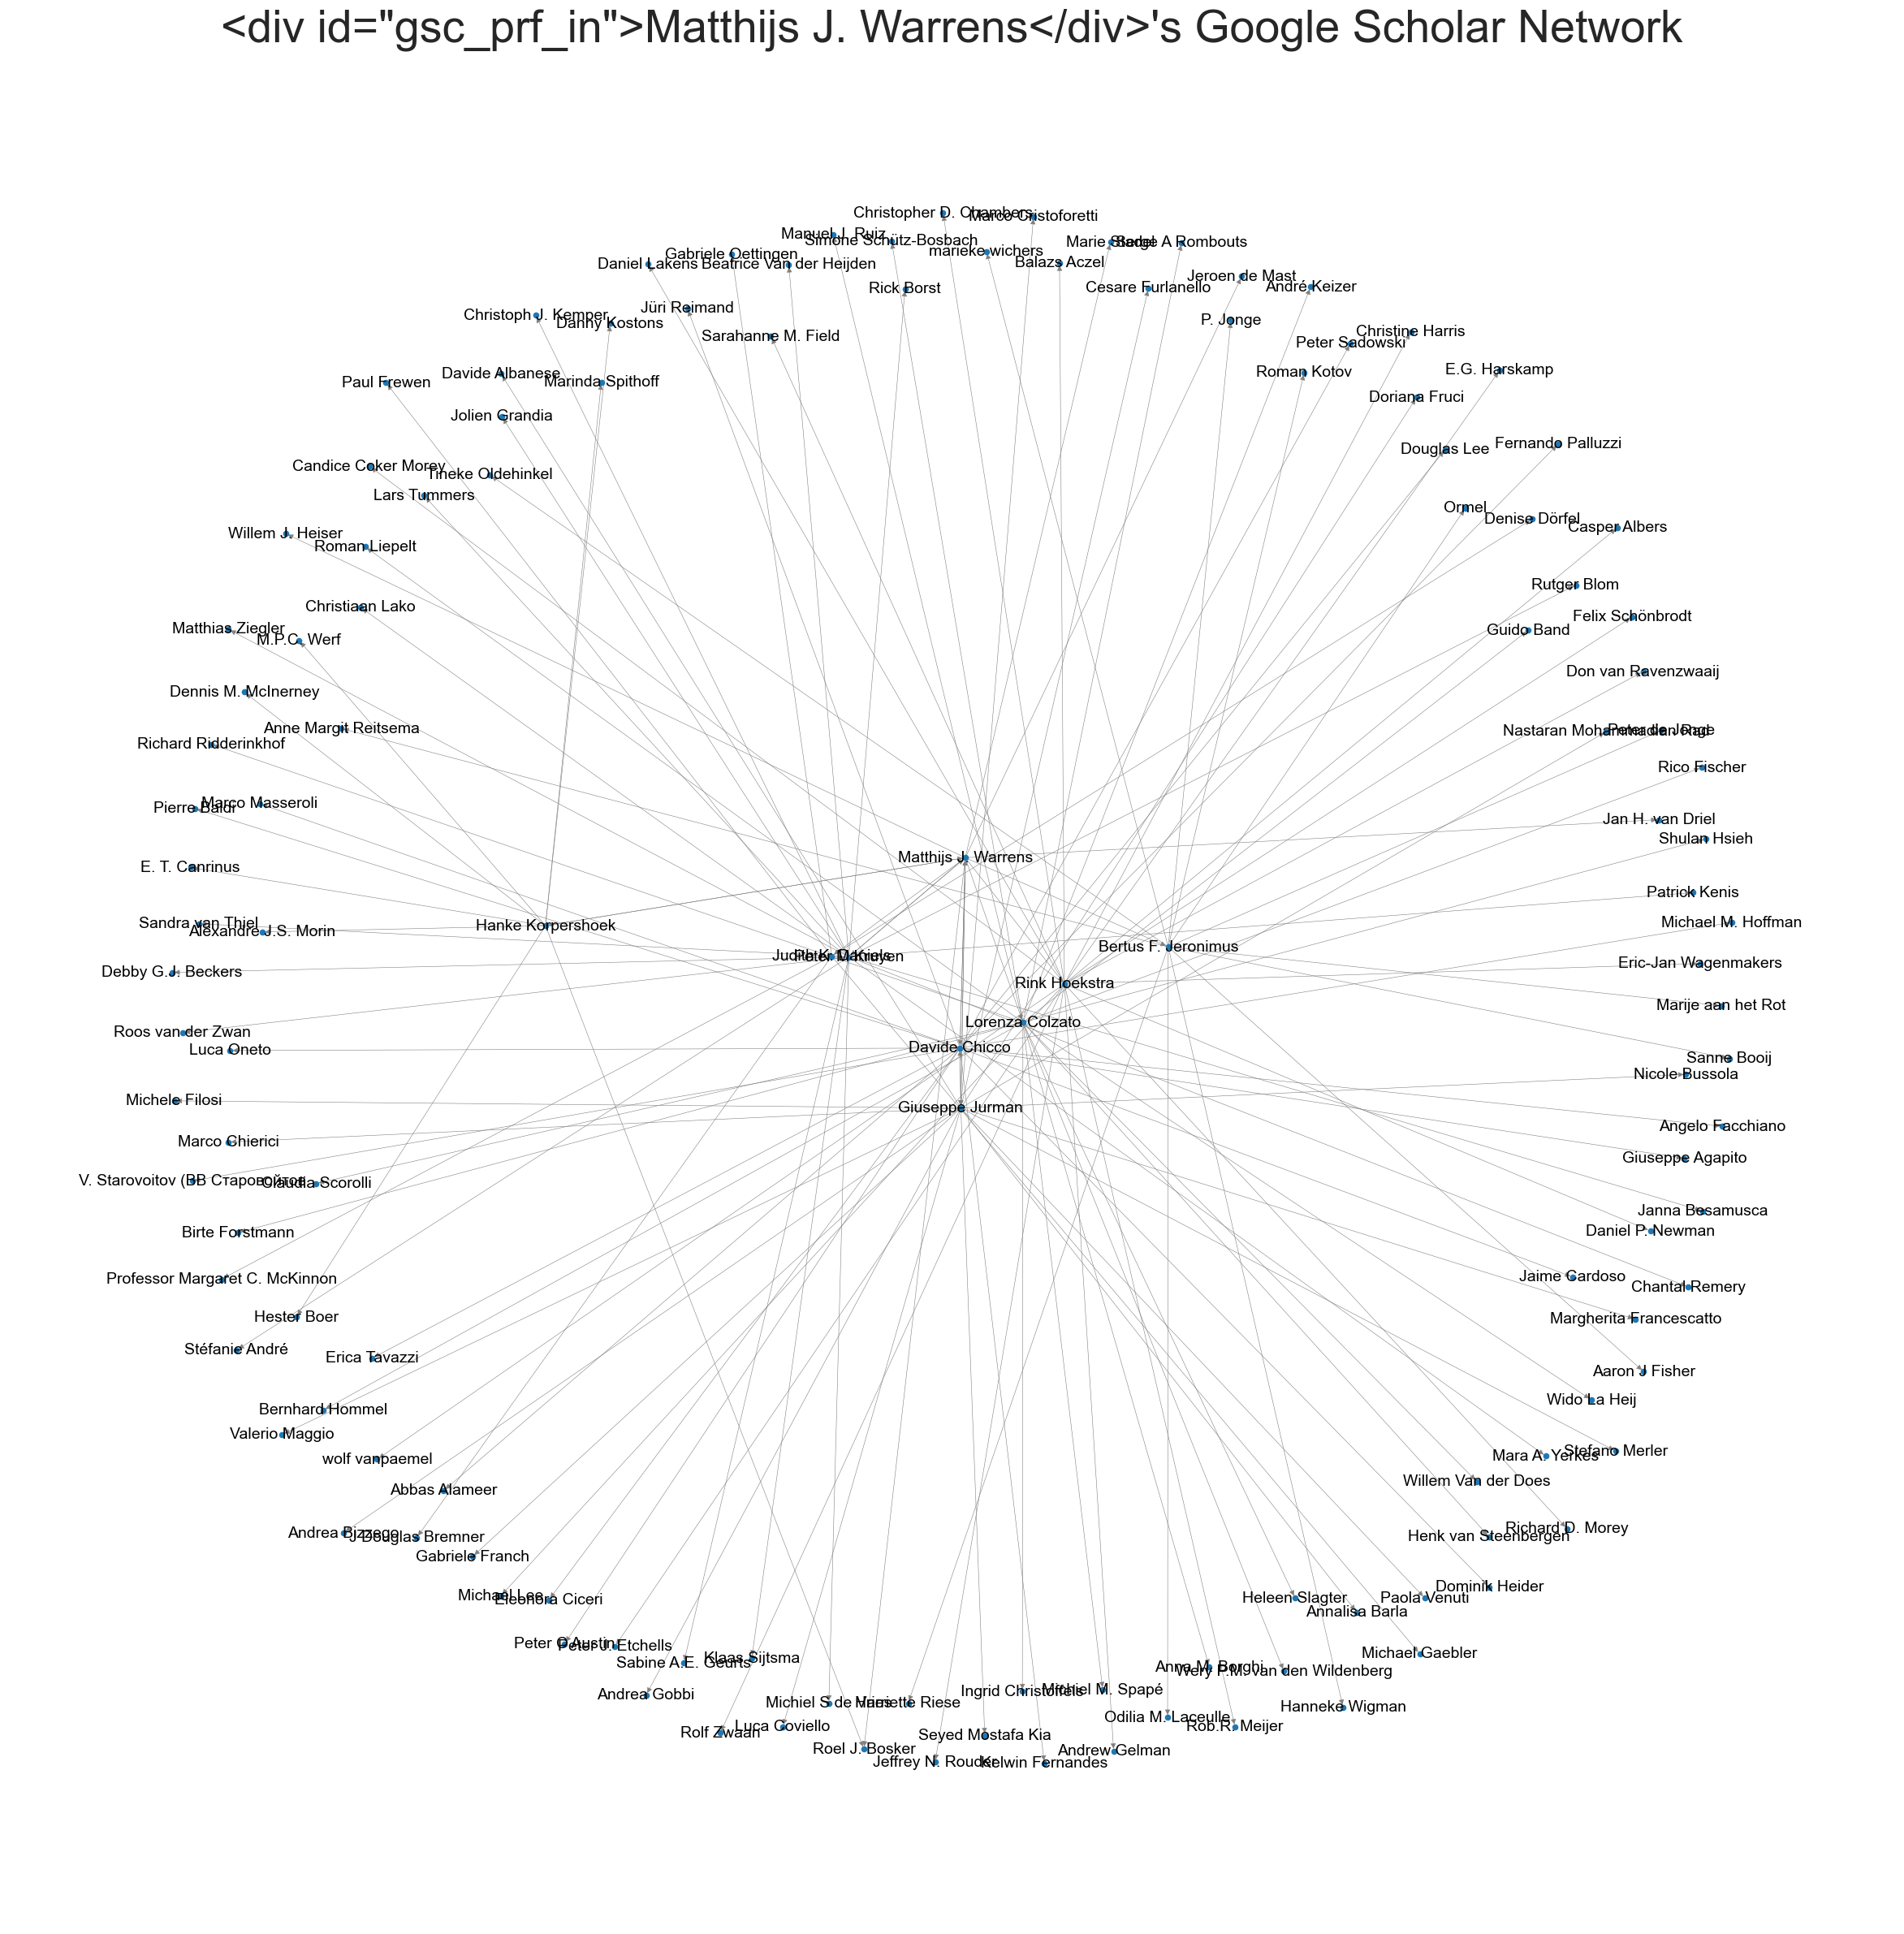

In [34]:
plot_(g)

In [7]:
#create Important subnetwork
def page_Rank(G):
    print("Google Page Rank Algorithm\n")
    rank = nx.pagerank(G) #page rank function to calculate pagerank centrality of each node
    for k,v in rank.items() :
        print("Page Rank Centrality :",k,'\t',v)
        
    r = [x for x in rank.values()] #contains all the page rank cenrtrality values in a list
    rsum = sum(r) #sum of all page rank centrality
    rlen = len(r) #length of r list 
    rfac = rsum/rlen #avrg page rank centrality 
    Gt = G.copy() #copy of graph g stored in gt variable
    
    
    for k, v in rank.items(): #iterates over the rank dictionary 
        if v < rfac: #checks if the page rank centrality of the current node v is less than the average page rank centrality rfac.checks if the page rank centrality of the current node v is less than the average page rank centrality rfac.
            Gt.remove_node(k) #remove the nodes if its pagerank centrality is less than avg. pgc
    return Gt #returns the modified graph Gt

In [18]:
Gt = page_Rank(g)

Google Page Rank Algorithm

Page Rank Centrality : Matthijs J. Warrens 	 0.008669870794324824
Page Rank Centrality : Roel J. Bosker 	 0.008247599722402767
Page Rank Centrality : Davide Chicco 	 0.007870401106111629
Page Rank Centrality : Giuseppe Jurman 	 0.007870401106111629
Page Rank Centrality : Hanke Korpershoek 	 0.007535944673793596
Page Rank Centrality : Willem J. Heiser 	 0.007535944673793596
Page Rank Centrality : Jan H. van Driel 	 0.007535944673793596
Page Rank Centrality : Rink Hoekstra 	 0.007535944673793596
Page Rank Centrality : Peter M Kruyen 	 0.007535944673793596
Page Rank Centrality : Lorenza Colzato 	 0.007535944673793596
Page Rank Centrality : Marie Stadel 	 0.007535944673793596
Page Rank Centrality : Judith K. Daniels 	 0.007535944673793596
Page Rank Centrality : Bertus F. Jeronimus 	 0.007535944673793596
Page Rank Centrality : Jeroen de Mast 	 0.007535944673793596
Page Rank Centrality : Marco Masseroli 	 0.007303514541523491
Page Rank Centrality : Luca Oneto 	 0.

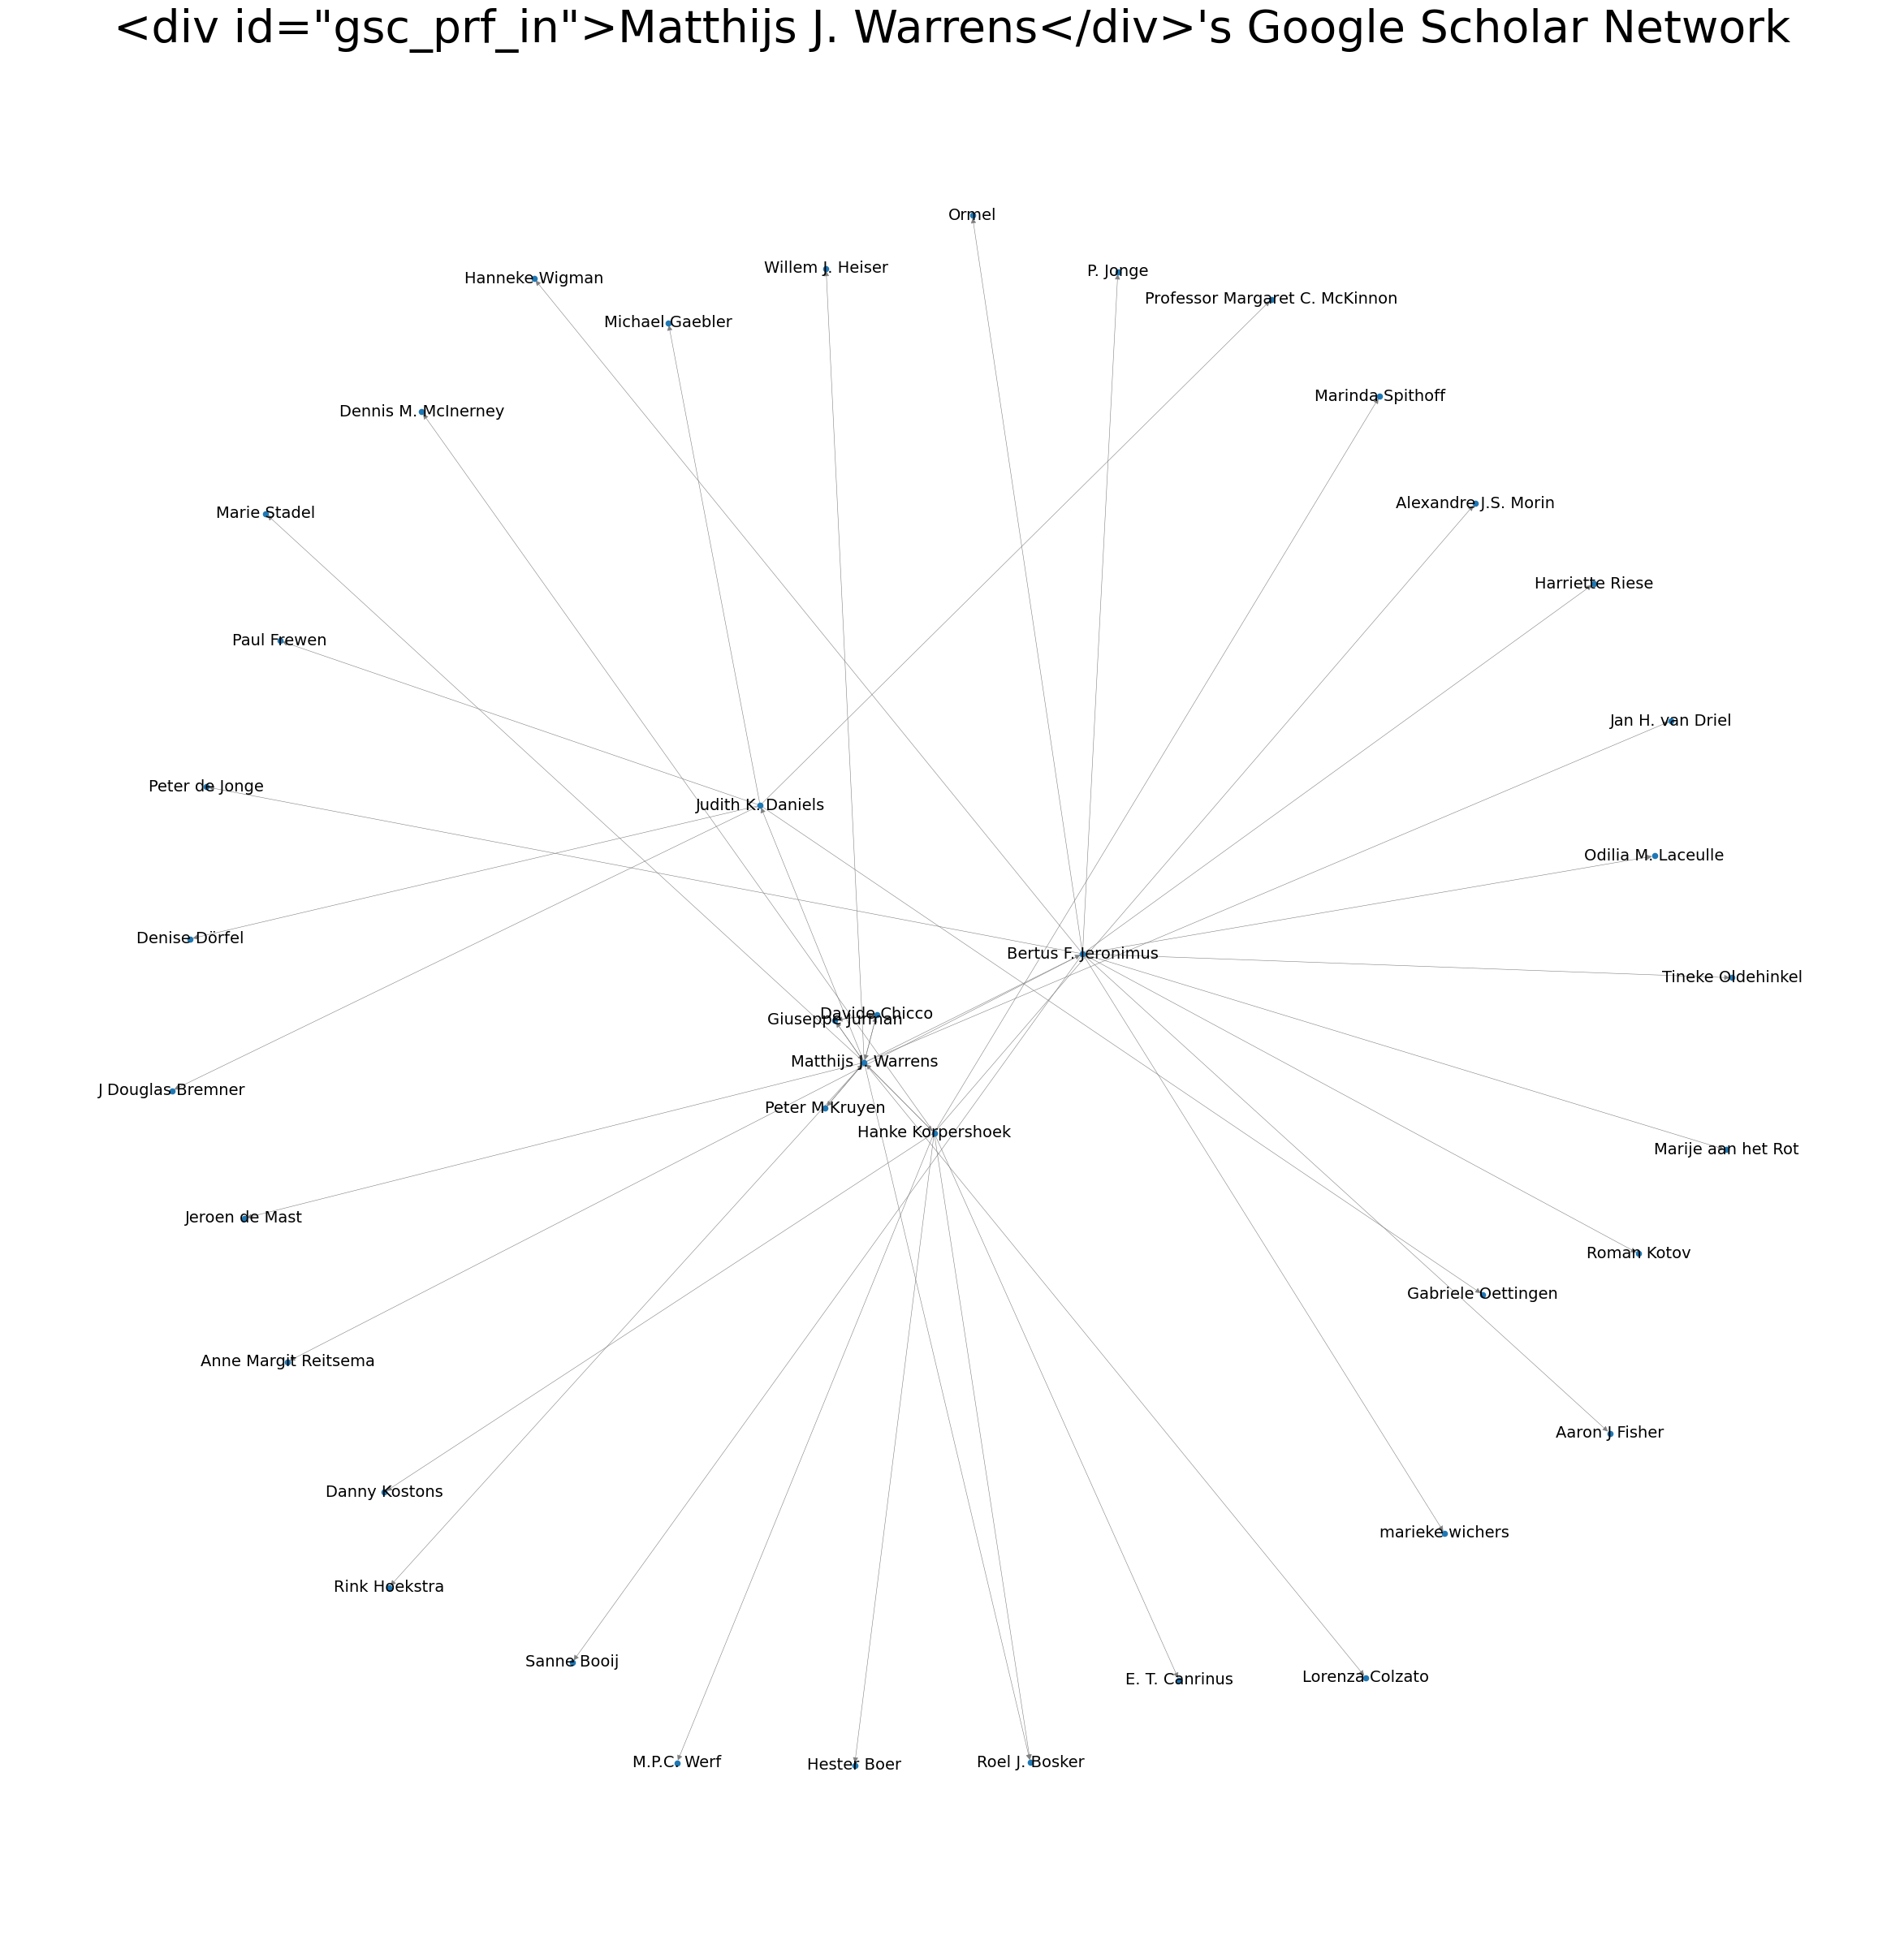

In [19]:
plot_(Gt)

In [8]:
mylist=[] #to obtain the degree of each node
degree =  g.degree() #dic to hold node and degree
for k,v in degree : #k-> node, v-> degree of node 
    print('Degree of Each Node :',k,'\t',v)
    mylist.append(v) #appending degree values to mylist

Degree of Each Node : Matthijs J. Warrens 	 17
Degree of Each Node : Roel J. Bosker 	 2
Degree of Each Node : Davide Chicco 	 22
Degree of Each Node : Giuseppe Jurman 	 22
Degree of Each Node : Hanke Korpershoek 	 10
Degree of Each Node : Willem J. Heiser 	 1
Degree of Each Node : Jan H. van Driel 	 1
Degree of Each Node : Rink Hoekstra 	 21
Degree of Each Node : Peter M Kruyen 	 21
Degree of Each Node : Lorenza Colzato 	 21
Degree of Each Node : Marie Stadel 	 1
Degree of Each Node : Judith K. Daniels 	 7
Degree of Each Node : Bertus F. Jeronimus 	 14
Degree of Each Node : Jeroen de Mast 	 1
Degree of Each Node : Marco Masseroli 	 1
Degree of Each Node : Luca Oneto 	 1
Degree of Each Node : Pierre Baldi 	 1
Degree of Each Node : Peter Sadowski 	 1
Degree of Each Node : Michael M. Hoffman 	 1
Degree of Each Node : Peter C Austin 	 1
Degree of Each Node : Douglas Lee 	 1
Degree of Each Node : Jaime Cardoso 	 1
Degree of Each Node : Kelwin Fernandes 	 1
Degree of Each Node : V. Starovoit

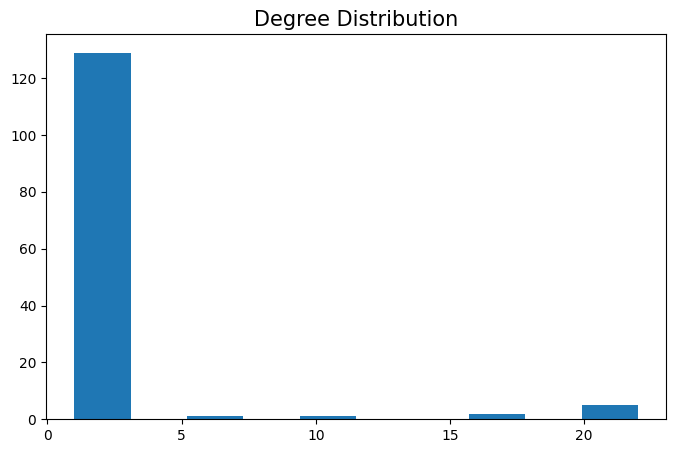

In [24]:
plt.figure(figsize = (8, 5))
plt.hist(mylist)
plt.title("Degree Distribution", fontsize = 15)
plt.show()
#120+ nodes having degree as 1

In [9]:
centality_value = []
centrality =  nx.degree_centrality(g) # to find degree centrality and hold in node and key pair
for each in centrality.items():
    print('Degree Centrality: ', each[0], '\t', each[1])
    centality_value.append(each[1])

Degree Centrality:  Matthijs J. Warrens 	 0.12686567164179105
Degree Centrality:  Roel J. Bosker 	 0.014925373134328358
Degree Centrality:  Davide Chicco 	 0.16417910447761194
Degree Centrality:  Giuseppe Jurman 	 0.16417910447761194
Degree Centrality:  Hanke Korpershoek 	 0.07462686567164178
Degree Centrality:  Willem J. Heiser 	 0.007462686567164179
Degree Centrality:  Jan H. van Driel 	 0.007462686567164179
Degree Centrality:  Rink Hoekstra 	 0.15671641791044777
Degree Centrality:  Peter M Kruyen 	 0.15671641791044777
Degree Centrality:  Lorenza Colzato 	 0.15671641791044777
Degree Centrality:  Marie Stadel 	 0.007462686567164179
Degree Centrality:  Judith K. Daniels 	 0.05223880597014925
Degree Centrality:  Bertus F. Jeronimus 	 0.1044776119402985
Degree Centrality:  Jeroen de Mast 	 0.007462686567164179
Degree Centrality:  Marco Masseroli 	 0.007462686567164179
Degree Centrality:  Luca Oneto 	 0.007462686567164179
Degree Centrality:  Pierre Baldi 	 0.007462686567164179
Degree Cent

In [23]:
#calculating average degree centrality
avg_centrality =  sum(centrality.values())/len(centrality)
print('Average Degree Centrality: ', avg_centrality)

Average Degree Centrality:  0.01558872305140956


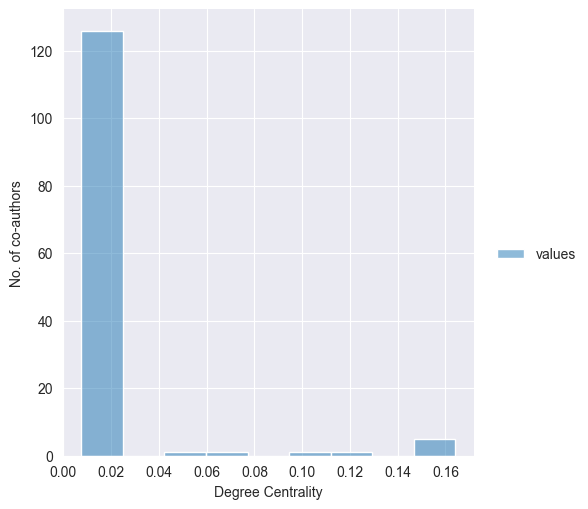

In [24]:
#creating a dataframe using the pandas library
#plotting a distribution plot using the seaborn library
import pandas as pd
y=list(centrality.values()) #centrality
x=list(centrality.keys()) #nodes
data = {'keys':x,'values':y} #data dictionary created   
df1 = pd.DataFrame.from_dict(data)
##Converting the data dictionary to a pandas dataframe df1.

sns.set_style('darkgrid') #style of seaborn plot
a=sns.displot(df1) #Creating a seaborn distribution plot with the df1 dataframe and assign-ing it to a
a.set_axis_labels(x_var="Degree Centrality", y_var="No. of co-authors") #setting axieses

In [25]:
close = nx.closeness_centrality(g) #finding closeness centrality and storing in lose dic key value pair  
for each in close.items():
    print('Closeness Centrality: ', each[0], '\t', each[1]) #space sequence

Closeness Centrality:  Matthijs J. Warrens 	 0.029850746268656716
Closeness Centrality:  Roel J. Bosker 	 0.023320895522388058
Closeness Centrality:  Davide Chicco 	 0.01990049751243781
Closeness Centrality:  Giuseppe Jurman 	 0.01990049751243781
Closeness Centrality:  Hanke Korpershoek 	 0.017057569296375266
Closeness Centrality:  Willem J. Heiser 	 0.020729684908789386
Closeness Centrality:  Jan H. van Driel 	 0.020729684908789386
Closeness Centrality:  Rink Hoekstra 	 0.020729684908789386
Closeness Centrality:  Peter M Kruyen 	 0.017057569296375266
Closeness Centrality:  Lorenza Colzato 	 0.020729684908789386
Closeness Centrality:  Marie Stadel 	 0.020729684908789386
Closeness Centrality:  Judith K. Daniels 	 0.020729684908789386
Closeness Centrality:  Bertus F. Jeronimus 	 0.020729684908789386
Closeness Centrality:  Jeroen de Mast 	 0.020729684908789386
Closeness Centrality:  Marco Masseroli 	 0.016960651289009497
Closeness Centrality:  Luca Oneto 	 0.016960651289009497
Closeness C

In [29]:
#calculation of average closenes
avg_closeness =  sum(close.values())/len(close)
print('Average Closeness: ', avg_closeness)

Average Closeness:  0.017139364890078987


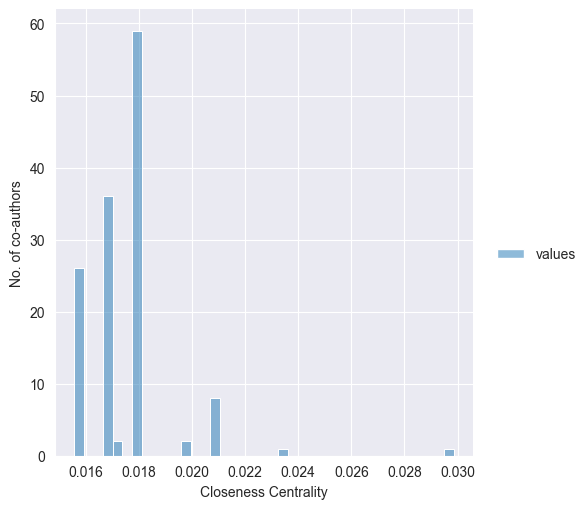

In [26]:
y=list(close.values())
x=list(close.keys())
data = {'keys':x,'values':y}
df1 = pd.DataFrame.from_dict(data) #'data' dictionary is used to createpandas DataFrame 'df1'' 

sns.set_style('darkgrid')
a=sns.displot(df1) #displot to plot a histogram
a.set_axis_labels(x_var="Closeness Centrality", y_var="No. of co-authors")

In [31]:
#calculating betweeness centrailty
btwn = nx.betweenness_centrality(g, weight='weight')
for each in btwn.items():
    print('Betweeness Centrality: ', each[0], '\t', each[1])

Betweeness Centrality:  Matthijs J. Warrens 	 0.023776298840704167
Betweeness Centrality:  Davide Chicco 	 0.003864319450407901
Betweeness Centrality:  Giuseppe Jurman 	 0.003864319450407901
Betweeness Centrality:  Roel J. Bosker 	 0.0
Betweeness Centrality:  Willem J. Heiser 	 0.0
Betweeness Centrality:  Hanke Korpershoek 	 0.0015027908973808501
Betweeness Centrality:  Jan H. van Driel 	 0.0
Betweeness Centrality:  Rink Hoekstra 	 0.0053671103477887505
Betweeness Centrality:  Peter M Kruyen 	 0.0040790038643194505
Betweeness Centrality:  Lorenza Colzato 	 0.0053671103477887505
Betweeness Centrality:  Marie Stadel 	 0.0
Betweeness Centrality:  Judith K. Daniels 	 0.0016101331043366252
Betweeness Centrality:  Bertus F. Jeronimus 	 0.004293688278231001
Betweeness Centrality:  Jeroen de Mast 	 0.0
Betweeness Centrality:  Marco Masseroli 	 0.0
Betweeness Centrality:  Pierre Baldi 	 0.0
Betweeness Centrality:  Peter Sadowski 	 0.0
Betweeness Centrality:  Michael M. Hoffman 	 0.0
Betweeness 

In [32]:
avg_betweenness =  sum(btwn.values())/len(btwn)
print('Average Betweenness: ', avg_betweenness)

Average Betweenness:  0.0003893099607345318


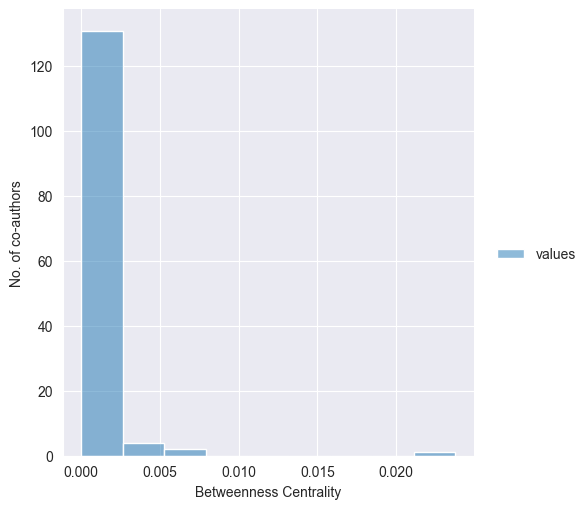

In [33]:
#using pandas and seaborn library 
y=list(btwn.values())
x=list(btwn.keys())
data = {'keys':x,'values':y}
df1 = pd.DataFrame.from_dict(data)


sns.set_style('darkgrid')
a=sns.displot(df1)
a.set_axis_labels(x_var="Betweenness Centrality", y_var="No. of co-authors")

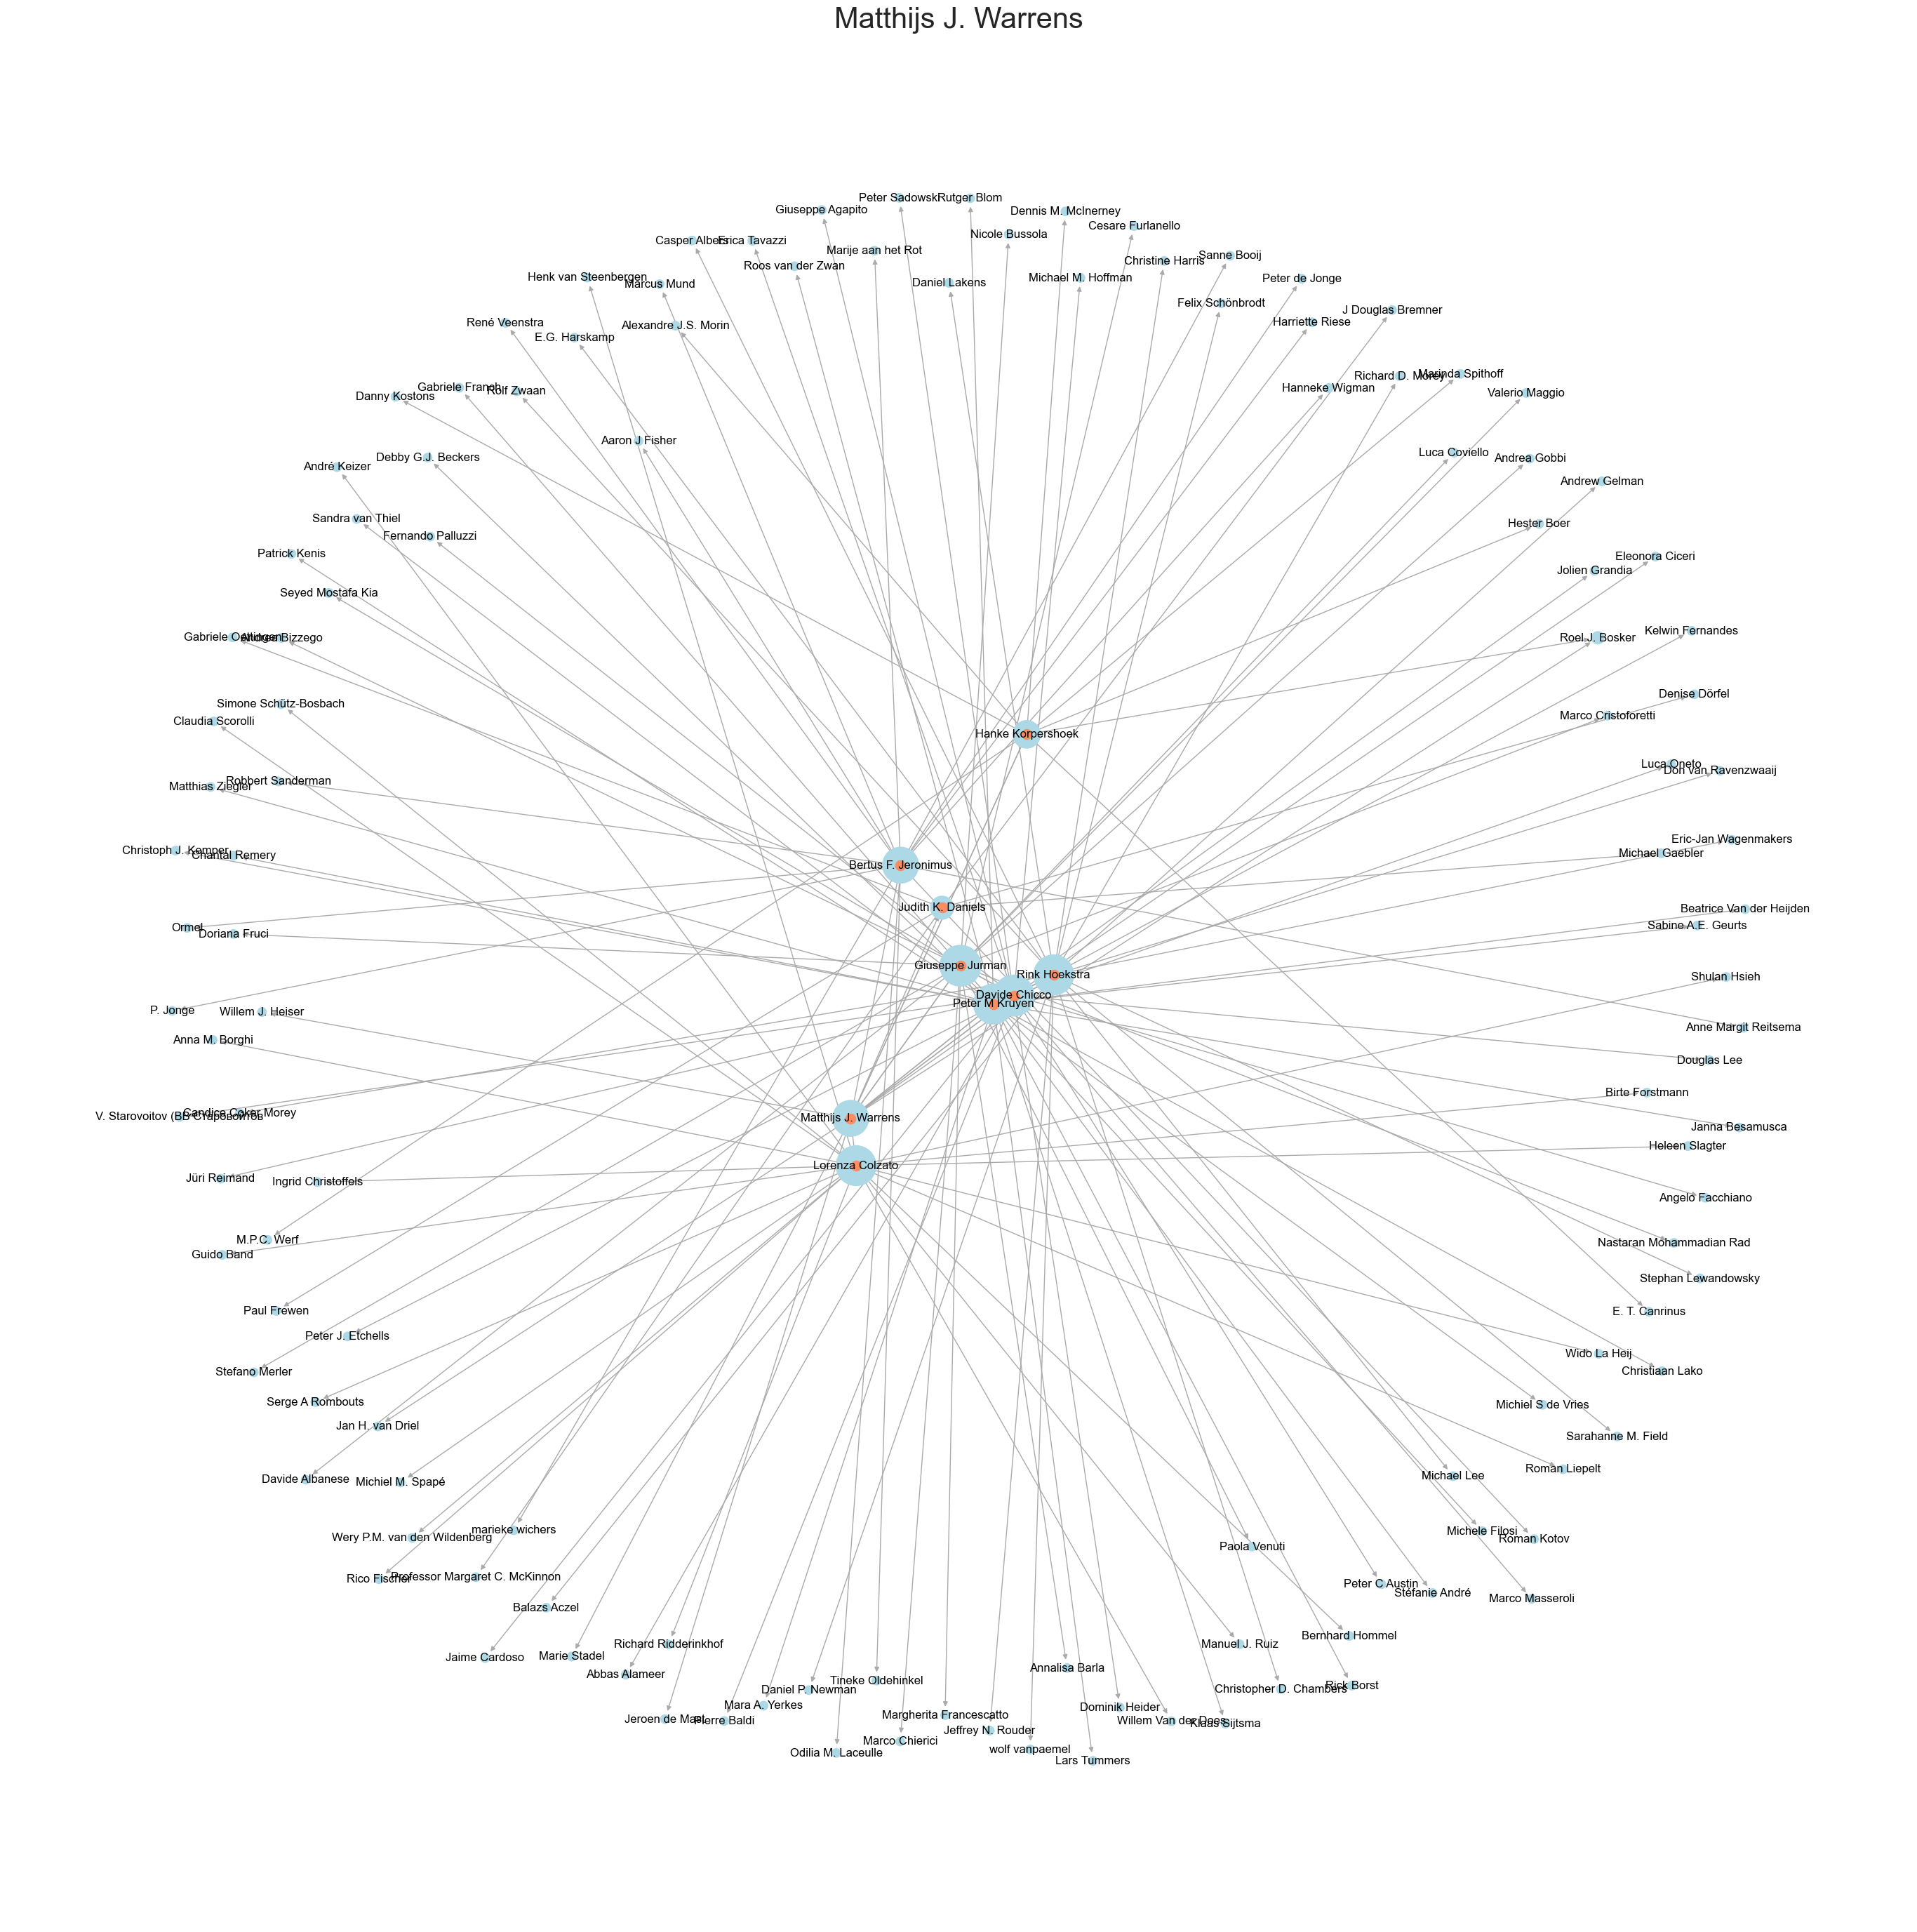

In [36]:
#creating network visualization of a graph 
def plot2(g, strng):
  plt.figure(figsize=(35, 35)) #size of the figure

  # 1. Create the graph
  # df=pd.read_csv("aaa.csv", encoding= 'unicode_escape')
  # g=nx.from_pandas_edgelist(df, source='author', target='coauthors')
  df=nx.to_pandas_edgelist(g) #converting graph g to pandas dataframe df
  #print(df)
  # 2. Create a layout for our nodes 
  layout = nx.spring_layout(g,iterations=50) #Creating layout for the nodes with 50 iterations

  # 3. Draw the parts we want
  nx.draw_networkx_edges(g, layout, edge_color='#AAAAAA') #draw edges

  coauthor = [node for node in g.nodes() if node in df.target.unique()]
  size = [g.degree(node) * 80 for node in g.nodes() if node in df.target.unique()]
  nx.draw_networkx_nodes(g, layout, nodelist=coauthor, node_size=size, node_color='lightblue')
  #draw nodes ^
  
  people = [node for node in g.nodes() if node in df.source.unique()]
  nx.draw_networkx_nodes(g, layout, nodelist=people, node_size=100, node_color='#AAAAAA')

  high_degree_people = [node for node in g.nodes() if node in df.source.unique() and g.degree(node) > 1]
  nx.draw_networkx_nodes(g, layout, nodelist=high_degree_people, node_size=100, node_color='#fc8d62')

  coauthors_dict = dict(zip(coauthor, coauthor))
  nx.draw_networkx_labels(g, layout, labels=coauthors_dict)

  plt.axis('off')

  plt.title("Matthijs J. Warrens Google Scholar Network", fontsize=30)
  # 4. Tell matplotlib to show it
  plt.savefig(strng)
  plt.show() #show the plot
plot2(g, "network.png")

#There are three types of nodes:
# coauthors (in light blue)
# people (in gray)
# high-degree people (in orange)
# The size and color of the nodes are determined
# by their degree (the number of edges connected to the node).

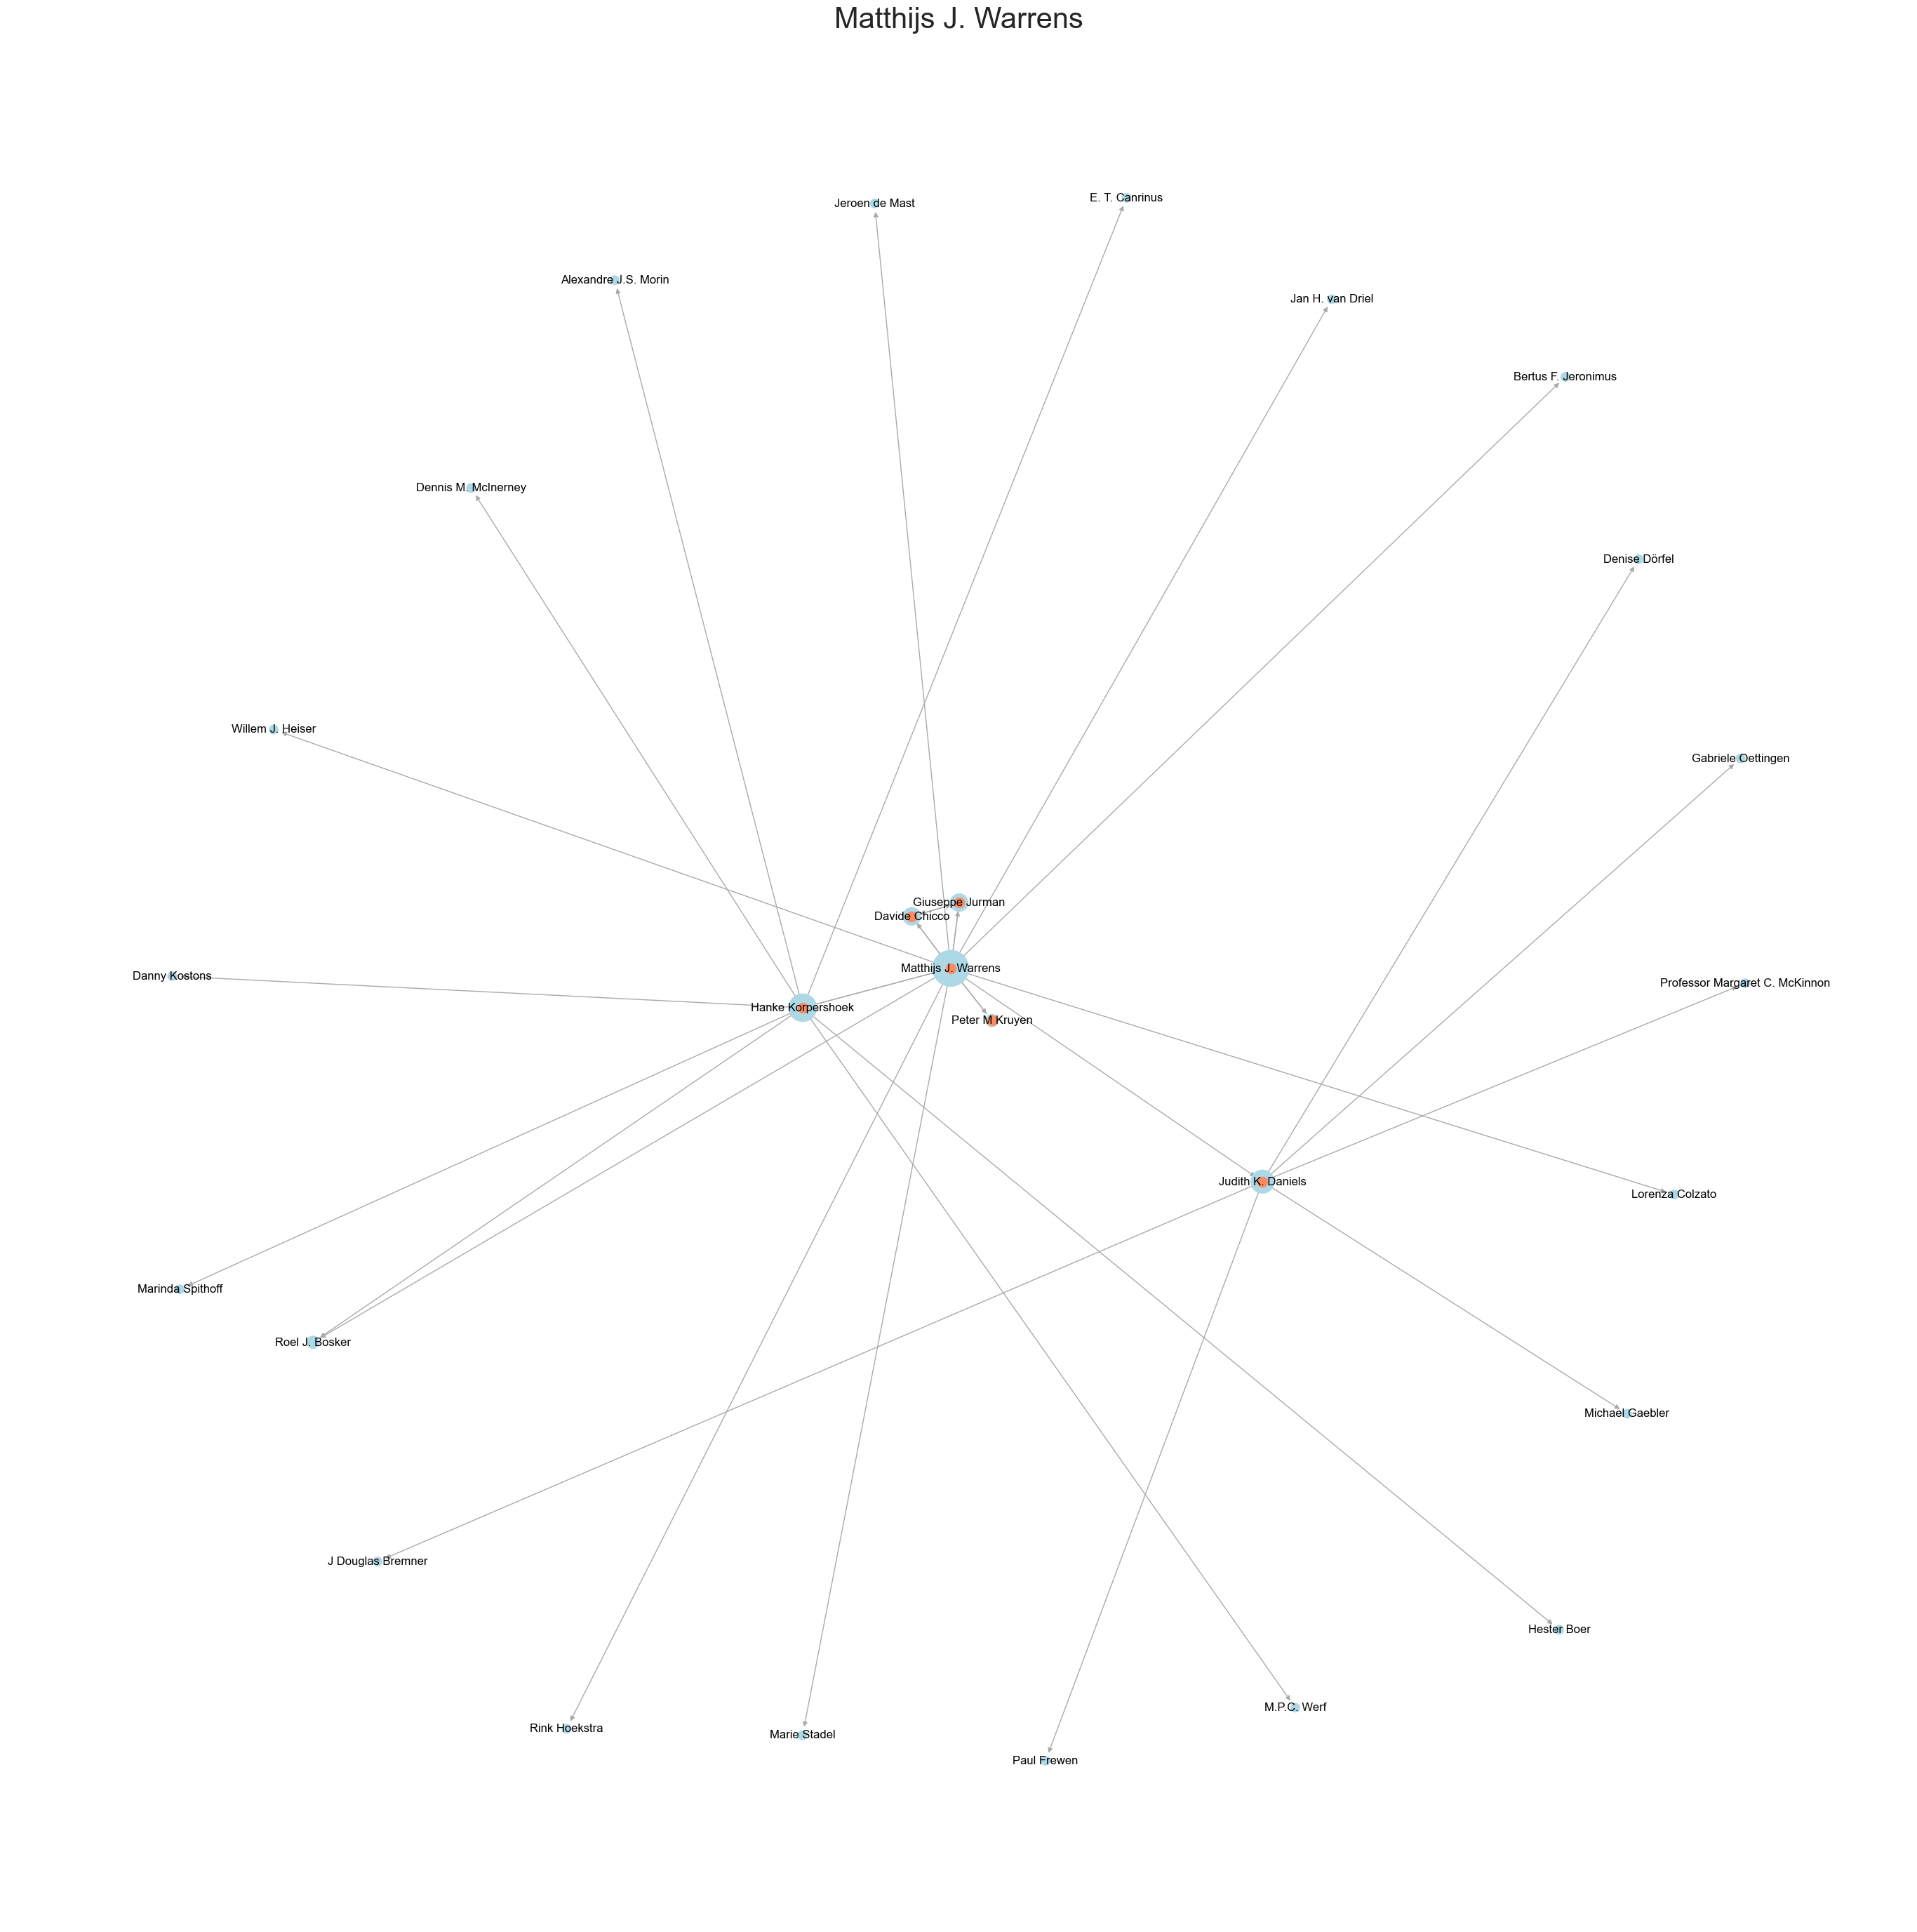

In [37]:
plot2(Gt, "impnetwork.png")